# Analysis of Steam gaming data (Kapezov Shyngys)

### Content
+ Introduction
+ Data Description and Objectives
+ Data preparation
+ EDA and Visualization

### 1. Introduction
Steam is an online digital distribution service for PC games and software developed and maintained by Valve. Steam acts as a technical copyright protection, multiplayer and streaming platform, and social network for players. Prior to 2009, most games released on Steam had traditional anti-piracy measures, including the assignment and distribution of product keys and support for digital rights management software tools such as SecuROM or non-malicious rootkits.

Streaming Downloads - Steam supports streaming content downloads. This allows you to prioritize content downloads. Thus, the part of the game that is required to start is loaded first. The rest of the files are in the background. The loading of the game level is suspended if the necessary files have not been loaded yet. Streaming content requires additional effort on the part of the developer, so not many games are actively using it.

The ability to buy a game for another person as a gift or to give someone an “extra” game that was bought again as part of a collection. Gifts have become the most common form of purchasing Steam games through third parties among users who are unable to buy the game directly due to the lack of a credit card. After the money is transferred, the intermediary buys the game as a gift through a credit card and sends it to the buyer via email or via Steam.

Source(https://en.wikipedia.org/wiki/Steam_(service)) 


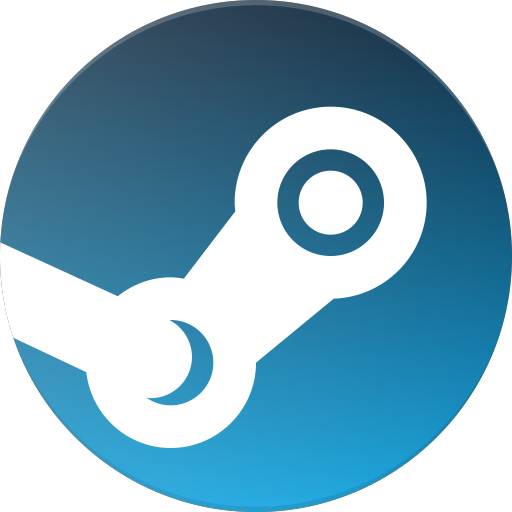

### 2. Data Description and Objectives
The gaming industry is evolving year after year and there is no exception that the topic of Steam games is quite popular among young people. There are Counter-Strike, Dota 2 games that have over a million owners. That is why, to me it is interesting to analyze such type of data since I face it from day to day. A dataset was taken from data.world. and made by craigkelly.
Chosen dataset was organized in 2016 based on 2009 year statistics and in order to provide more powerful and actual project the web scraping of nowadays statistics will be used further. 
+ RecommendationCount - integer, number of games recommendations.
+ SteamSpyPlayersEstimate - integer, best estimate of total number of people who have played the game since March 2009
+ PlatformWindows - bool, games that are available on Windows
+ PlatformLinux - bool, games that are available on Linux
+ PlatformMac - bool, games that are available on Mac
+ CategorySinglePlayer - bool, single player game category
+ CategoryMultiplayer - bool, multiplayer game category
+ CategoryCoop - bool, cooperative game category
+ CategoryMMO - bool, MMO game category
+ GenreIsIndie - bool, indie game genre
+ GenreIsAction - bool, action game genre
+ GenreIsAdventure - bool, adventure game genre
+ GenreIsCasual - bool, casual game genre
+ GenreIsStrategy - bool, strategy game genre
+ GenreIsRPG - bool, RPG game genre
+ GenreIsSimulation - bool, simulation game genre

Research questions: 
1. Analyze the games` recommendations rate towards players among top 100 games.
2. Analyze the ratio between the number of free and non-free games in different operating systems.
3. Analyze which of categories, like singleplayer, multiplayer,cooperative, MMO, VR is most popular.
4. Analyze the three most popular and least popular genres of games.
5. Analyze the difference between the number of owners of the top 100 games between 2009 and the present.

### 3. Data preparation

In [1]:
#manipulation with first research question
import numpy as np
import pandas as pd


In [2]:
col_li = ["QueryName","RecommendationCount","SteamSpyPlayersEstimate"]#having an appropriate array with required columns 
pd1=pd.read_csv('games-features.csv',usecols=col_li)

In [3]:
pd1.dropna()#checking for the missing values.
pd2=pd1.sort_values(by='SteamSpyPlayersEstimate',ascending=0)#sortring in descending order group by SteamSpyPlayersEstimate
pd3=pd2[pd2.RecommendationCount!=0]
pd3[pd3.SteamSpyPlayersEstimate!=0]
#deleting rows with values=0

,QueryName,RecommendationCount,SteamSpyPlayersEstimate
23,Dota 2,590480,90687580
20,Team Fortress 2,383949,37878812
27,Counter-Strike: Global Offensive,1427633,25150372
4028,Unturned,222301,21438373
22,Left 4 Dead 2,140726,13583400
...,...,...,...
7546,Mooch,109,1076
8807,Ultimate Arena,158,897
8364,Divergence: Online,118,803
1947,CRYENGINE,224,803


In [4]:
#manipulation with second research question
col_li=["QueryName","PlatformWindows","PlatformLinux","PlatformMac","PCMinReqsText","LinuxMinReqsText","MacMinReqsText","PriceFinal"]
pd11=pd.read_csv('games-features.csv',usecols=col_li)

In [5]:
pd11.dropna()
pd11['PlatformWindows'] = pd11['PlatformWindows'].astype(int)
pd11['PlatformLinux'] = pd11['PlatformLinux'].astype(int)
pd11['PlatformMac'] = pd11['PlatformMac'].astype(int)
pd11
#changing boolean values True/False to integers 1/0

,QueryName,PlatformWindows,PlatformLinux,PlatformMac,PriceFinal,PCMinReqsText,LinuxMinReqsText,MacMinReqsText
0,Counter-Strike,1,1,1,9.99,Minimum: 500 mhz processor 96mb ram 16mb video...,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...
1,Team Fortress Classic,1,1,1,4.99,Minimum: 500 mhz processor 96mb ram 16mb video...,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...
2,Day of Defeat,1,1,1,4.99,Minimum: 500 mhz processor 96mb ram 16mb video...,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...
3,Deathmatch Classic,1,1,1,4.99,Minimum: 500 mhz processor 96mb ram 16mb video...,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...
4,Half-Life: Opposing Force,1,1,1,4.99,Minimum: 500 mhz processor 96mb ram 16mb video...,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...
...,...,...,...,...,...,...,...,...
13352,Baseball Riot,1,0,0,0.00,Minimum:OS: Windows XP / Vista / 7 / 8 / 10Pro...,,
13353,Passage 4,1,0,0,0.00,Minimum:OS: Windows 2000/XP/Vista/7/8/10Proces...,,
13354,Piximalism,1,0,0,0.00,Minimum:OS: Microsoft(r) Windows(r) XP / Vista...,,
13355,Technoball,1,0,0,0.00,Minimum:OS: Windows 7 (64-bit)Processor: 2.5 G...,,


In [6]:
#manipulation with third research question
col_li=["QueryName","CategorySinglePlayer","CategoryMultiplayer","CategoryCoop","CategoryMMO","CategoryVRSupport"]
pd21=pd.read_csv('games-features.csv',usecols=col_li)
pd21.dropna()

,QueryName,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryVRSupport
0,Counter-Strike,False,True,False,False,False
1,Team Fortress Classic,False,True,False,False,False
2,Day of Defeat,False,True,False,False,False
3,Deathmatch Classic,False,True,False,False,False
4,Half-Life: Opposing Force,True,True,False,False,False
...,...,...,...,...,...,...
13352,Baseball Riot,True,False,False,False,False
13353,Passage 4,True,False,False,False,False
13354,Piximalism,True,False,False,False,False
13355,Technoball,True,True,True,False,False


In [7]:
#manipulation with forth research question
col_li=["QueryName","GenreIsIndie","GenreIsAction","GenreIsAdventure","GenreIsCasual","GenreIsStrategy","GenreIsRPG","GenreIsSimulation","GenreIsSports","GenreIsRacing"]
pd41=pd.read_csv('games-features.csv',usecols=col_li)
pd41.dropna()

,QueryName,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsSports,GenreIsRacing
0,Counter-Strike,False,True,False,False,False,False,False,False,False
1,Team Fortress Classic,False,True,False,False,False,False,False,False,False
2,Day of Defeat,False,True,False,False,False,False,False,False,False
3,Deathmatch Classic,False,True,False,False,False,False,False,False,False
4,Half-Life: Opposing Force,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
13352,Baseball Riot,True,False,False,True,False,False,False,True,False
13353,Passage 4,True,False,False,True,False,False,False,False,False
13354,Piximalism,True,True,True,True,False,False,False,False,False
13355,Technoball,True,True,False,True,False,False,False,True,False


In [8]:
#manipulation with fifth research question
col_li=["QueryName","SteamSpyOwners"]
pd41=pd.read_csv('games-features.csv',usecols=col_li)
pd42=pd41.dropna()
pd43=pd42.sort_values(by='SteamSpyOwners',ascending=0)
pd43.head(100).rename(columns={'QueryName': 'Game', 'SteamSpyOwners': 'Game owners'})
#top 100 steamspyowners from dataset+ changes in column names//data shaping


,Game,Game owners
23,Dota 2,90687580
20,Team Fortress 2,37878812
4028,Unturned,27025292
27,Counter-Strike: Global Offensive,25833156
22,Left 4 Dead 2,15574539
...,...,...
1546,XCOM: Enemy Unknown,3498393
30,Killing Floor,3496958
4473,Life Is Strange™,3446920
2015,Defiance,3409615


In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [10]:
# req = requests.get("https://steamspy.com/")
# soup = BeautifulSoup(req.content,'lxml')
# lists = soup.find_all('td')
# print(lists)

### 4. EDA and Visualization 

#### 1 research question: Analyze the games` recommendations rate towards players among top 100 games.

In [11]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [12]:
pd3.head(10)

,QueryName,RecommendationCount,SteamSpyPlayersEstimate
23,Dota 2,590480,90687580
20,Team Fortress 2,383949,37878812
27,Counter-Strike: Global Offensive,1427633,25150372
4028,Unturned,222301,21438373
22,Left 4 Dead 2,140726,13583400
150,Garry's Mod,237684,11871328
11,Counter-Strike: Source,53931,11472993
1365,The Elder Scrolls V: Skyrim,182587,10903558
276,Sid Meier's Civilization V,85750,9150595
0,Counter-Strike,68991,9140731


In [13]:
pd3.shape

(4894, 3)

In [14]:
pd3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4894 entries, 23 to 3657
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   QueryName                4894 non-null   object
 1   RecommendationCount      4894 non-null   int64 
 2   SteamSpyPlayersEstimate  4894 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 152.9+ KB


In [15]:
pd3.describe()

,RecommendationCount,SteamSpyPlayersEstimate
count,4.894000e+03,4.894000e+03
mean,3.221790e+03,2.815570e+05
std,2.494166e+04,1.644744e+06
min,1.010000e+02,0.000000e+00
25%,2.010000e+02,1.739700e+04
50%,4.410000e+02,4.878300e+04
75%,1.404000e+03,1.576480e+05
max,1.427633e+06,9.068758e+07


In [16]:
pd3.rename(columns={'QueryName': 'Game', 'RecommendationCount': 'Recommendations','SteamSpyPlayersEstimate':'Players Estimate'})

,Game,Recommendations,Players Estimate
23,Dota 2,590480,90687580
20,Team Fortress 2,383949,37878812
27,Counter-Strike: Global Offensive,1427633,25150372
4028,Unturned,222301,21438373
22,Left 4 Dead 2,140726,13583400
...,...,...,...
4612,SteamVR Performance Test,2582,0
3362,World of Subways 3 – London Underground Circle...,198,0
6511,Deponia The Complete Journey daily adv app,899,0
3359,Munich Bus Simulator,105,0


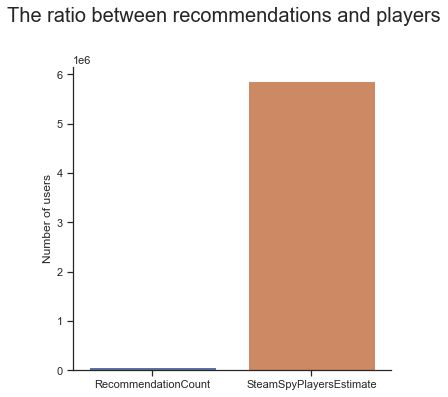

In [17]:
ax=sns.catplot(data=pd3.head(100),   
             kind="bar",
           ci=0,
            );
ax.fig.suptitle('The ratio between recommendations and players',fontsize=20,y=1.1)
ax.set(ylabel='Number of users')

#### Analysis of first research question:
The graph shows the difference between recommendations and overall people among top 100 games sorted by players estimate. As it can be seen from the graph above players estimate is significantly greater than recommendation count, which means that despite the number of users playing games the number of recommendations remains at the same level, or in other words is independent 

#### 2 research question: Analyze the ratio between the number of free and non-free games in different operating systems.

In [18]:
pd11.describe()

,PlatformWindows,PlatformLinux,PlatformMac,PriceFinal
count,13357.000000,13357.000000,13357.000000,13357.000000
mean,0.999850,0.228869,0.341544,8.798596
std,0.012236,0.420120,0.474245,13.606061
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.990000
50%,1.000000,0.000000,0.000000,5.990000
75%,1.000000,0.000000,1.000000,9.990000
max,1.000000,1.000000,1.000000,449.990000


In [19]:
pd11.drop('PCMinReqsText',inplace=True,axis=1)
pd11.drop('LinuxMinReqsText',inplace=True,axis=1)
pd11.drop('MacMinReqsText',inplace=True,axis=1)
#dropping unnecessary columns about platforms` Min  Requests

In [20]:
pd11["PriceFinal"].describe()

count    13357.000000
mean         8.798596
std         13.606061
min          0.000000
25%          1.990000
50%          5.990000
75%          9.990000
max        449.990000
Name: PriceFinal, dtype: float64

In [21]:
pd11.head()

,QueryName,PlatformWindows,PlatformLinux,PlatformMac,PriceFinal
0,Counter-Strike,1,1,1,9.99
1,Team Fortress Classic,1,1,1,4.99
2,Day of Defeat,1,1,1,4.99
3,Deathmatch Classic,1,1,1,4.99
4,Half-Life: Opposing Force,1,1,1,4.99


In [22]:
pd11.tail()

,QueryName,PlatformWindows,PlatformLinux,PlatformMac,PriceFinal
13352,Baseball Riot,1,0,0,0.0
13353,Passage 4,1,0,0,0.0
13354,Piximalism,1,0,0,0.0
13355,Technoball,1,0,0,0.0
13356,Ghostlight Manor,1,0,1,0.0


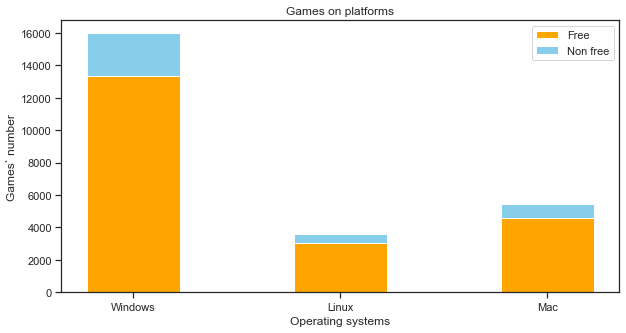

In [23]:
labels = ['Windows', 'Linux', 'Mac']#x axis labels
total = [pd11["PlatformWindows"].sum(), pd11["PlatformLinux"].sum(), pd11["PlatformMac"].sum()]
#total num of platforms  
with_condition = [len(pd11[(pd11["PlatformWindows"]==1)&(pd11["PriceFinal"]==0)]),#Indicating free games in each platform
              len(pd11[(pd11["PlatformLinux"]==1)&(pd11["PriceFinal"]==0)]),
              len(pd11[(pd11["PlatformMac"]==1)&(pd11["PriceFinal"]==0)])]
width = 0.45
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(labels, total, width, label='Free', color='orange')
ax.bar(labels, with_condition, width, bottom=total, label='Non free',color='skyblue')

ax.set_ylabel('Games` number')
ax.set_xlabel('Operating systems')
ax.set_title('Games on platforms')
ax.legend()

plt.show()

#### Analysis of second research question and graph below:
According to the graph the most popular operating system is Windows with the value of about 13000 games. The least popular platform is Linux with the approximate number of 3000 games. In general,there is a direct dependency between free and non free games on different platforms. However, according to the graph, the ratio between free and non free games are almost the same. In fact, it varies between 5.1 and 5.5, where the greatest proportion is in the Linux platform. It means that by choosing Linux operating system, which is not expensive by itself, user spends much less money on the games.


### Research question 3

In [24]:
pd21.head()

,QueryName,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryVRSupport
0,Counter-Strike,False,True,False,False,False
1,Team Fortress Classic,False,True,False,False,False
2,Day of Defeat,False,True,False,False,False
3,Deathmatch Classic,False,True,False,False,False
4,Half-Life: Opposing Force,True,True,False,False,False


In [25]:
pd21.shape

(13357, 6)

In [26]:
pd21.describe()

,QueryName,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryVRSupport
count,13356,13357,13357,13357,13357,13357
unique,13283,2,2,2,2,2
top,Train Simulator,True,False,False,False,False
freq,5,11687,9876,12023,13034,13120


In [27]:
pd21.rename(columns={'QueryName': 'Game', 'CategorySinglePlayer': 'Single Player','CategoryMultiplayer':'Multiplayer',
                    'CategoryCoop':'Cooperative','CategoryMMO':'MMO','CategoryVRSupport':'VR Support'})

,Game,Single Player,Multiplayer,Cooperative,MMO,VR Support
0,Counter-Strike,False,True,False,False,False
1,Team Fortress Classic,False,True,False,False,False
2,Day of Defeat,False,True,False,False,False
3,Deathmatch Classic,False,True,False,False,False
4,Half-Life: Opposing Force,True,True,False,False,False
...,...,...,...,...,...,...
13352,Baseball Riot,True,False,False,False,False
13353,Passage 4,True,False,False,False,False
13354,Piximalism,True,False,False,False,False
13355,Technoball,True,True,True,False,False


[Text(0.5, 0, 'Proportion of owners')]

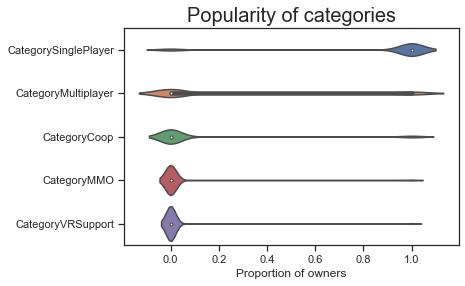

In [47]:
ax=sns.violinplot(data=pd21,  
#                kind="line",
               orient="h",
#                ci=0,
#                height=4,
#                aspect=2,
            );
ax.set_title('Popularity of categories',fontsize=20)
ax.set(xlabel='Proportion of owners')

#### Analysis of third research question: Analyze which of categories, like singleplayer, multiplayer,cooperative, MMO, VR is most popular.
According to the graph the single player category is distributed about 1.0. While other are located closer to the 0.0 which means that single player games are by far the most popular category. As for the VR Support games, they can be considered as the least popular one. 